In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Part II: Problem Solving Section:**


1. **Preprocessing and EDA**: Based on the given dataset(champs.csv) and the
decoded variables in table 1, do the following preprocessing and Exploratory
Data Analysis (EDA):








**Importing important libraries**

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px


# Here I read the data set using pandas libries
A.   **Read the dataset**



In [207]:
df = pd.read_csv("/content/drive/MyDrive/EPHI_Project_Ewnetu/Data_sets/CHAMPS.csv")
df.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


**How many rows and columns are they in the dataset**


B.  Number of rows and columns in the data set




In [208]:
df.shape

(444, 381)

*We have 444  rows and 381 columns in the data set*

**Enumerate the columns of the dataset**

C.   Enumerate the columns of the dataset



In [209]:
print(df.columns)#here we enumerate all the columns of the data set

Index(['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002',
       'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007',
       ...
       'dpf_012___ch00040', 'dpf_012___ch00041', 'dpf_012___ch00042',
       'dpf_012___ch00043', 'dpf_012___ch01424', 'dpf_012___ch01875',
       'dpf_012___ch00010', 'dpf_013', 'dpf_014',
       'crf_060302_decode_panel_feedback_form_complete'],
      dtype='object', length=381)


**D. Rename the columns. Example: rename column dp_013 to case_type**

D. Rename the columns. Example: rename column dp_013 to case_type

In [210]:
### rename all the columens of the data set
df_renamed = df.rename(columns = {'dp_013':'case_type', 'champs_id':'mortality','dp_108': 'underlying cause',  'dp_118': 'Main maternal disease condition affecting the child/fetus'})

In [211]:
df_renamed.head()

,packet_version_id,id_ver_nmb,mortality,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [212]:
df_renamed['case_type'].value_counts()

case_type
CH00716    239
CH01404     69
CH01405     49
CH00719     42
CH00718     27
CH01406     18
Name: count, dtype: int64

In [213]:
df_renamed['case_type'].unique()

array(['CH00716', 'CH00719', 'CH01406', 'CH00718', 'CH01404', 'CH01405'],
      dtype=object)

**E. Rename values. Example: rename CH00716 to Stillbirth. Do the same for
others too.**


E.  Rename values. Example: rename CH00716 to Stillbirth. Do the same for
others too.

In [214]:
conditions = [df_renamed['case_type'] == 'CH00716',df_renamed['case_type'] == 'CH00719', df_renamed['case_type'] == 'CH01406', df_renamed['case_type'] == 'CH00718',df_renamed['case_type'] == 'CH01404',df_renamed['case_type'] == 'CH01405']
vars = ['Stillbirth','Death in the first 24 hours','Early Neonate','Late Neonate','Infant','Child']
df_renamed['case_type'] = np.select(conditions, vars)

In [215]:
##check
df_renamed['case_type'].unique()

array(['Stillbirth', 'Death in the first 24 hours', 'Early Neonate',
       'Late Neonate', 'Infant', 'Child'], dtype=object)

# F. Show the proportion of null values in each column.

In [216]:
df_renamed.isnull().mean()# the proportion of null  values for each columns in the data set

packet_version_id                                 0.000000
id_ver_nmb                                        0.000000
mortality                                         0.000000
dp_001                                            0.000000
dp_002                                            0.000000
                                                    ...   
dpf_012___ch01875                                 0.000000
dpf_012___ch00010                                 0.000000
dpf_013                                           0.590090
dpf_014                                           0.603604
crf_060302_decode_panel_feedback_form_complete    0.000000
Length: 381, dtype: float64

In [217]:
## case 2 the propertion of all  null  values in each columns
df_renamed.isnull().sum()

packet_version_id                                   0
id_ver_nmb                                          0
mortality                                           0
dp_001                                              0
dp_002                                              0
                                                 ... 
dpf_012___ch01875                                   0
dpf_012___ch00010                                   0
dpf_013                                           262
dpf_014                                           268
crf_060302_decode_panel_feedback_form_complete      0
Length: 381, dtype: int64

# 2. Descriptive Data analysis: looking back to the dataset above

#A.   What are the magnitude and proportion of each of the infant underlying cause for child death?


In [218]:
##lets check the unique value of the undelying case columns.
df_renamed['underlying cause'].unique()

array(['Undetermined', 'Intrauterine hypoxia',
       'Severe acute malnutrition - Kwashiorkor', 'Sepsis',
       'Pneumonia. unspecified', 'Pneumonia, unspecified',
       'Hyaline membrane disease', 'Birth asphyxia',
       'Severe acute malnutrition', 'Low birth weight',
       'Chromosomal abnormality', 'Intrauterine hypoxia ', 'Preterm baby',
       'Retardation intrauterine growth', 'Meconium aspiration syndrome',
       'intrauterine hypoxia', 'Preterm', 'Gastroenteritis',
       'Respiratory distress syndrome/HMD', 'Hydrocephalus',
       'Neural tube defect', 'Hydrops fetalis',
       'Neural tube defect - spina bifida',
       'Bacterial sepsis of newborn ', 'Measles',
       'Congenital muscular-skeletal abnormality',
       'Congenital malformation syndrome', 'Meconium aspiration',
       'hydrops fetalis', 'Neonatal jaundice',
       'Neural tube defect -Lumbar spina bifida',
       'Congenital malformation ', 'Low birth weigth',
       'Intrauterine growth restriction', '

In [219]:
## What are the magnitude and proportion of each of the infant underlying cause for child death?
cause_of_death = df_renamed['underlying cause']
cause_counts = cause_of_death.value_counts()
# Calculate total deaths
total_deaths = len(cause_of_death)

# Calculate proportion of deaths for each underlying cause
proportion_deaths = (cause_counts / total_deaths) * 100

In [220]:
print(proportion_deaths)

underlying cause
Intrauterine hypoxia                                33.333333
Birth asphyxia                                       7.432432
Undetermined                                         6.306306
Severe acute malnutrition                            5.405405
Craniorachischisis                                   3.603604
                                                      ...    
Severe acute malnutrition-Kwashiorkor                0.225225
severe acute malnutrition, Marasmic Kwashiorkor      0.225225
Severe acute malnutrition - Marasmic kwashiorkor     0.225225
Congenital CMV infection                             0.225225
Bacterial sepsis of the newborn                      0.225225
Name: count, Length: 97, dtype: float64


In [221]:
# Print results in a formatted table
print("Infant Underlying Cause of Death | Magnitude | Proportion (%)")
print("----------------------------------|----------|--------------")
for cause, count in cause_counts.items():
  proportion = proportion_deaths[cause]
  print(f"{cause} | {count} | {proportion:.2f}")

Infant Underlying Cause of Death | Magnitude | Proportion (%)
----------------------------------|----------|--------------
Intrauterine hypoxia | 148 | 33.33
Birth asphyxia | 33 | 7.43
Undetermined | 28 | 6.31
Severe acute malnutrition | 24 | 5.41
Craniorachischisis | 16 | 3.60
Respiratory distress syndrome | 15 | 3.38
Sepsis | 11 | 2.48
Intrauterine growth restriction | 10 | 2.25
Preterm baby | 9 | 2.03
Low birth weight | 8 | 1.80
Meconium aspiration syndrome | 7 | 1.58
Pneumonia | 6 | 1.35
Intrauterine hypoxia  | 5 | 1.13
Preterm infant | 5 | 1.13
Anencephaly | 5 | 1.13
Hyaline membrane disease | 4 | 0.90
Thoracic spina bifida with hydrocephalus | 4 | 0.90
Bacterial sepsis of newborn | 4 | 0.90
Measles | 3 | 0.68
Iniencephaly | 3 | 0.68
Lumbar spina bifida with hydrocephalus | 3 | 0.68
Severe acute malnutrition  | 3 | 0.68
Pneumonia, unspecified | 3 | 0.68
Intrauterine growth restriction  | 2 | 0.45
Severe acute malnutrition - Kwashiorkor | 2 | 0.45
Neural tube defect -Craniorachisch

#B. What are the proportion and magnitude of the maternal factors contributing for child death?

In [222]:
cause_of_death = df_renamed['Main maternal disease condition affecting the child/fetus']
cause_counts = cause_of_death.value_counts()
# Calculate total deaths
total_deaths = len(cause_of_death)

# Calculate proportion of deaths for each underlying cause
proportion_deaths = (cause_counts / total_deaths) * 100
print(proportion_deaths)

Main maternal disease condition affecting the child/fetus
Preeclampsia                                                                                             8.108108
Twin pregnancy                                                                                           2.702703
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta)    2.477477
Eclampsia                                                                                                2.027027
Fetus and newborn affected by other forms of placental separation and hemorrhage                         1.126126
                                                                                                           ...   
Fetus and newborn affected by oligohydramnios                                                            0.225225
Fetus and newborn affected by maternal diabetes                                                          0.225225
Fetus and newborn affected by 

In [223]:
# Print results in a formatted table
print("Main maternal disease condition affecting the child/fetus' | Magnitude | Proportion (%)")
print("----------------------------------|----------|--------------")
for cause, count in cause_counts.items():
  proportion = proportion_deaths[cause]
  print(f"{cause} | {count} | {proportion:.2f}")

Main maternal disease condition affecting the child/fetus' | Magnitude | Proportion (%)
----------------------------------|----------|--------------
Preeclampsia | 36 | 8.11
Twin pregnancy | 12 | 2.70
Fetus and newborn affected by other forms of placental separation and hemorrhage (Abruption placenta) | 11 | 2.48
Eclampsia | 9 | 2.03
Fetus and newborn affected by other forms of placental separation and hemorrhage  | 5 | 1.13
Fetus and newborn affected by other malpresentation, malposition, and disproportion during labor and delivery | 5 | 1.13
Uterine rupture | 3 | 0.68
Fetus and newborn affected by multiple pregnancy: Twin (pregnancy)  | 3 | 0.68
Abruption placenta | 3 | 0.68
Fetus and newborn affected by chorioamnionitis  | 3 | 0.68
preeclampsia | 3 | 0.68
Undetermined | 2 | 0.45
Fetus and newborn affected by placenta previa  | 2 | 0.45
Fetus affected by cord prolapse | 2 | 0.45
Antepartum hemorrhage | 2 | 0.45
Chorioamnionitis | 2 | 0.45
Fetus affected by breech presentation | 2 | 0

# C. What are the proportion of the child death by the case type

In [224]:
cause_of_death = df_renamed['case_type']
cause_counts = cause_of_death.value_counts()
# Calculate total deaths
total_deaths = len(cause_of_death)

# Calculate proportion of deaths for each underlying cause
proportion_deaths = (cause_counts / total_deaths) * 100
print(proportion_deaths)

case_type
Stillbirth                     53.828829
Infant                         15.540541
Child                          11.036036
Death in the first 24 hours     9.459459
Late Neonate                    6.081081
Early Neonate                   4.054054
Name: count, dtype: float64


In [225]:
# Print results in a formatted table
print("case type' | Magnitude | Proportion (%)")
print("----------------------------------|----------|--------------")
for cause, count in cause_counts.items():
  proportion = proportion_deaths[cause]
  print(f"{cause} | {count} | {proportion:.2f}")

case type' | Magnitude | Proportion (%)
----------------------------------|----------|--------------
Stillbirth | 239 | 53.83
Infant | 69 | 15.54
Child | 49 | 11.04
Death in the first 24 hours | 42 | 9.46
Late Neonate | 27 | 6.08
Early Neonate | 18 | 4.05


## 2.Correlation analysis: Using correlation or Heat Maps, show how each of the infant under lying conditions and maternal factors are correlated to the top three causes of the child death identified above under 2(A)

In [226]:
filtered_df = df_renamed[['underlying cause', 'Main maternal disease condition affecting the child/fetus', 'case_type']] #Selectining the three columns of the data frame
filtered_df.head()

,underlying cause,Main maternal disease condition affecting the child/fetus,case_type
0,Undetermined,Undetermined,Stillbirth
1,Undetermined,Undetermined,Stillbirth
2,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
3,Severe acute malnutrition - Kwashiorkor,NaN,Death in the first 24 hours
4,Sepsis,NaN,Early Neonate


In [227]:
df_corr = filtered_df[filtered_df.case_type.isin(["Stillbirth", "Infant","Child"])]#selecting the top three case type
df_corr.head()

,underlying cause,Main maternal disease condition affecting the child/fetus,case_type
0,Undetermined,Undetermined,Stillbirth
1,Undetermined,Undetermined,Stillbirth
2,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
7,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...,Stillbirth
8,Intrauterine hypoxia,Uterine rupture,Stillbirth


In [228]:
from scipy.stats import chi2_contingency

In [229]:
# Convert 'underlying cause' to a categorical variable
df_corr['underlying cause'] = pd.Categorical(df_corr['underlying cause'])

# Convert 'Main maternal disease condition affecting the child/fetus' to a categorical variable
df_corr['Main maternal disease condition affecting the child/fetus'] = pd.Categorical(df_corr['Main maternal disease condition affecting the child/fetus'])

# Create a contingency table (example using 'underlying cause')
contingency_table = pd.crosstab(df_corr['underlying cause'], df_corr['case_type'])

# Calculate Cramer's V (using the contingency table created above)
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cramers_v_statistic = cramers_v(contingency_table)

print("Cramer's V statistic:", cramers_v_statistic)

Cramer's V statistic: 0.603122609627669


<ipython-input-229-6df2bd78acb4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['underlying cause'] = pd.Categorical(df_corr['underlying cause'])
<ipython-input-229-6df2bd78acb4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['Main maternal disease condition affecting the child/fetus'] = pd.Categorical(df_corr['Main maternal disease condition affecting the child/fetus'])


#4.  Feature engineering: You are expected to select the top infant underlying causes and maternal factors(features) that would contribute to the top three causes of child death identified under 2(A) above. For this, you need to select the best and likely features. In doing so:

#A.  Select the classification models LogisticRegression, Support Vector Machine, AdaBoostClassifier, Random Forest Classifier , Gradient Boosting Classifier and XGBOOST and train each on the dataset




In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [231]:
## LogisticRegression Model
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_lgr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

# Train the logistic regression model
pipeline_lgr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_lgr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7777777777777778


# Support Vector Machine

In [232]:
from sklearn.svm import SVC

In [233]:
## Support Vector Machine
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_svc = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='linear'))]) # You can choose different kernels like 'rbf', 'poly', etc.

# Train the Support Vector Machine model
pipeline_svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_svc.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7638888888888888


# AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [234]:
# Support Vector Machine
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_ada = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', AdaBoostClassifier(n_estimators=50, learning_rate=1.0))])  # You can adjust the parameters as needed

# Train the AdaBoostClassifier model
pipeline_ada.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_ada.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7916666666666666


# Random Forest Classifier

In [235]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
# Random Forest Classifier
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_RandomForestClassifier = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  RandomForestClassifier(n_estimators=100, random_state=42))])  # change the parametr

# Train the Random Forest Classifier model
pipeline_RandomForestClassifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_RandomForestClassifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7916666666666666


# Gradient Boosting Classifier

In [237]:
from sklearn.ensemble import GradientBoostingClassifier

In [238]:
# Gradient Boosting Classifier
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, random_state=42))])  # change the parametr

# Train the Gradient Boosting Classifier model
pipeline_gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_gb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7916666666666666


# XGBOOST Classifier

In [239]:
import xgboost as xgb

In [240]:
#XGBOOST Classifier
# Separate features and target variable
X = df_corr[['underlying cause', 'Main maternal disease condition affecting the child/fetus']]
y = df_corr['case_type']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the preprocessing steps for string features
# Handle unknown categories in the OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), ['underlying cause', 'Main maternal disease condition affecting the child/fetus'])
    ])

# Create a pipeline with preprocessing and logistic regression model
pipeline_xgb = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier',  xgb.XGBClassifier(objective='binary:logistic', random_state=42))])  # change the parametr

# Train the XGBOOST Classifier model
pipeline_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline_xgb.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7777777777777778


#B. Import the appropriate package for each of the classification models above

**Allready I  was imported all the packages and libraries**

**C. Rank the features based on their importance for each of the top underlying
causes of child death identified above under 2(A), for each of the
classification algorithms under (A )**

In [241]:
# Get feature importances for LogisticRegression

# Get coefficients for LogisticRegression

# Fit the pipeline
pipeline_lgr.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = pipeline_lgr.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get coefficients
coefficients_lgr = pipeline_lgr.named_steps['classifier'].coef_[0]
# Create a DataFrame to display coefficients
df_corr_coefficients_lgr = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_lgr})
df_corr_coefficients_lgr = df_corr_coefficients_lgr.sort_values(by='Coefficient', ascending=False)
print("Logistic Regression Classifier coefficients:")
print(df_corr_coefficients_lgr)

Logistic Regression Classifier coefficients:
                                               Feature  Coefficient
44                          underlying cause_Pneumonia     0.979727
48                     underlying cause_Preterm infant     0.967282
93   Main maternal disease condition affecting the ...     0.712761
99   Main maternal disease condition affecting the ...     0.700206
36       underlying cause_Meconium aspiration syndrome     0.686089
..                                                 ...          ...
52   underlying cause_Thoracic spina bifida with hy...    -0.409496
25    underlying cause_Intrauterine growth restriction    -0.440669
16                 underlying cause_Craniorachischisis    -0.585357
126  Main maternal disease condition affecting the ...    -0.850171
28               underlying cause_Intrauterine hypoxia    -1.335671

[142 rows x 2 columns]


#  Get feature importances for Support Vector Machine

In [242]:
# Get feature importances for Support Vector Machine
# Fit the pipeline
#pipeline_lgr.fit(X_train, y_train)
# Get feature names after one-hot encoding
feature_names = pipeline_svc.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get coefficients
coefficients_svc = pipeline_svc.named_steps['classifier'].coef_[0]

# Convert coefficients to a dense array to be compatible with sorting
coefficients_svc = coefficients_svc.toarray().flatten() # Flatten to a 1D array

# Create a DataFrame to display coefficients
df_corr_coefficients_svc = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients_svc})
df_corr_coefficients_svc = df_corr_coefficients_svc.sort_values(by='Coefficient', ascending=False)
print("Support Vector Machine Classifier coefficients:")
print(df_corr_coefficients_svc)

Support Vector Machine Classifier coefficients:
                                               Feature  Coefficient
54                       underlying cause_Undetermined     1.244246
68   Main maternal disease condition affecting the ...     1.000000
132  Main maternal disease condition affecting the ...     1.000000
37                  underlying cause_Neonatal jaundice     1.000000
35                underlying cause_Meconium aspiration     1.000000
..                                                 ...          ...
123  Main maternal disease condition affecting the ...    -1.000000
117  Main maternal disease condition affecting the ...    -1.000000
126  Main maternal disease condition affecting the ...    -1.075306
18           underlying cause_Hyaline membrane disease    -1.090058
28               underlying cause_Intrauterine hypoxia    -1.112531

[142 rows x 2 columns]


#  Get feature importances for AdaBoostClassifier

In [243]:
# Get feature importances for AdaBoostClassifier

# Now you can get the feature importances
pipeline_ada.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = pipeline_ada.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get feature importances
feature_importances_ada = pipeline_ada.steps[-1][1].feature_importances_

# Create a DataFrame to display feature importances
df_corr_importances_ada = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_ada})
df_corr_importances_ada = df_corr_importances_ada.sort_values(by='Importance', ascending=False)
print("AdaBoost Classifier feature importances:")
print(df_corr_importances_ada)

AdaBoost Classifier feature importances:
                                               Feature  Importance
28               underlying cause_Intrauterine hypoxia        0.20
141  Main maternal disease condition affecting the ...        0.10
36       underlying cause_Meconium aspiration syndrome        0.04
5                      underlying cause_Birth asphyxia        0.04
54                       underlying cause_Undetermined        0.04
..                                                 ...         ...
61   Main maternal disease condition affecting the ...        0.00
60   Main maternal disease condition affecting the ...        0.00
59   Main maternal disease condition affecting the ...        0.00
58   Main maternal disease condition affecting the ...        0.00
71   Main maternal disease condition affecting the ...        0.00

[142 rows x 2 columns]


## Get feature importances for Random Forest

In [244]:
# Get feature importances for Random Forest
# Now you can get the feature importances
pipeline_RandomForestClassifier.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = pipeline_RandomForestClassifier.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get feature importances
feature_importances_rf = pipeline_RandomForestClassifier.steps[-1][1].feature_importances_

# Create a DataFrame to display feature importances
df_corr_importances_rf = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_rf})
df_corr_importances_rf = df_corr_importances_rf.sort_values(by='Importance', ascending=False)
print("Random Forest Classifier feature importances:")
print(df_corr_importances_rf)

Random Forest Classifier feature importances:
                                               Feature  Importance
5                      underlying cause_Birth asphyxia    0.150006
49      underlying cause_Respiratory distress syndrome    0.068928
28               underlying cause_Intrauterine hypoxia    0.065480
36       underlying cause_Meconium aspiration syndrome    0.035549
32                   underlying cause_Low birth weight    0.026467
..                                                 ...         ...
83   Main maternal disease condition affecting the ...    0.000072
124  Main maternal disease condition affecting the ...    0.000070
78   Main maternal disease condition affecting the ...    0.000068
102  Main maternal disease condition affecting the ...    0.000058
80   Main maternal disease condition affecting the ...    0.000049

[142 rows x 2 columns]


# Get feature importances for Gradient Boosting Classifier

In [256]:
# Get feature importances for Gradient Boosting Classifier
# Now you can get the feature importances
pipeline_gb.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = pipeline_gb.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get feature importances
feature_importances_gb = pipeline_gb.steps[-1][1].feature_importances_

# Create a DataFrame to display feature importances
df_corr_importances_gb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_gb})
df_corr_importances_gb = df_corr_importances_gb.sort_values(by='Importance', ascending=False)
print("Gradient Boosting Classifier feature importances:")
print(df_corr_importances_gb)

Gradient Boosting Classifier feature importances:
                                              Feature  Importance
5                     underlying cause_Birth asphyxia    0.330582
49     underlying cause_Respiratory distress syndrome    0.191129
28              underlying cause_Intrauterine hypoxia    0.097705
48                    underlying cause_Preterm infant    0.067454
18          underlying cause_Hyaline membrane disease    0.044048
..                                                ...         ...
43  underlying cause_Neural tube defect -Lumbar sp...    0.000000
42  underlying cause_Neural tube defect -Craniorac...    0.000000
41  underlying cause_Neural tube defect - iniencep...    0.000000
40  underlying cause_Neural tube defect - Craniora...    0.000000
71  Main maternal disease condition affecting the ...    0.000000

[142 rows x 2 columns]


# *Get feature importances for XGBOOST Classifier*

In [257]:
# Get feature importances for XGBOOST Classifier
# Now you can get the feature importances
pipeline_xgb.fit(X_train, y_train)

# Get feature names after one-hot encoding
feature_names = pipeline_xgb.named_steps['preprocessor'].named_transformers_['onehot'].get_feature_names_out(X.columns)

# Get feature importances
feature_importances_xgb = pipeline_xgb.steps[-1][1].feature_importances_

# Create a DataFrame to display feature importances
df_corr_importances_xgb = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances_xgb})
df_corr_importances_xgb = df_corr_importances_xgb.sort_values(by='Importance', ascending=False)
print("XGBOOST Classifier feature importances:")
print(df_corr_importances_xgb)

XGBOOST Classifier feature importances:
                                              Feature  Importance
48                    underlying cause_Preterm infant    0.167434
47                      underlying cause_Preterm baby    0.146854
18          underlying cause_Hyaline membrane disease    0.118869
5                     underlying cause_Birth asphyxia    0.074385
49     underlying cause_Respiratory distress syndrome    0.060498
..                                                ...         ...
50   underlying cause_Retardation intrauterine growth    0.000000
46                           underlying cause_Preterm    0.000000
45         underlying cause_Polycystic kidney disease    0.000000
44                         underlying cause_Pneumonia    0.000000
71  Main maternal disease condition affecting the ...    0.000000

[142 rows x 2 columns]


# 5. Model evaluation using the proper metrics

#A. Import the appropriate evaluation metric packages

In [258]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score


# B. Using the appropriate n-fold cross validation and out of sample data, select the best preforming model from the candidate models under 4(A)

In [269]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for handling categorical features

# Define the candidate models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(kernel='linear'),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, learning_rate=1.0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost': xgb.XGBClassifier(objective='binary:logistic', random_state=42)
}

# Assuming 'X' is our original feature DataFrame
X_encoded = X.copy()  # Create a copy to avoid modifying the original

# Explicitly include 'underlying cause' for Label Encoding
# Ensure all your categorical columns are included here
categorical_cols = ['underlying cause', 'Main maternal disease condition affecting the child/fetus']  # Add other categorical columns if any

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Convert all values to strings before fitting the LabelEncoder
    all_data = pd.concat([X_encoded[col].astype(str), X_test[col].astype(str)])
    le.fit(all_data)
    X_encoded.loc[:, col] = le.transform(X_encoded[col].astype(str))
    X_test.loc[:, col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le  # Store the encoders for later use if needed

# Perform n-fold cross-validation
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42) # Use the encoded features
best_model = None
best_accuracy = 0

for name, model in models.items():
    # Debug by setting error_score='raise' to get more informative error messages
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
    mean_accuracy = cv_scores.mean()
    print(f'{name} - Mean Accuracy: {mean_accuracy}')

    if mean_accuracy > best_accuracy:
        best_model = model
        best_accuracy = mean_accuracy

# Evaluate the best performing model on out-of-sample data
best_model.fit(X_train, y_train)

# The test data has already been transformed above, so no need to transform again
# for col in categorical_cols:
#     X_test.loc[:, col] = label_encoders[col].transform(X_test[col])

y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model: {best_model.__class__.__name__} - Test Accuracy: {test_accuracy}')

Logistic Regression - Mean Accuracy: 0.656140350877193
Support Vector Machine - Mean Accuracy: 0.6596491228070175
AdaBoost - Mean Accuracy: 0.7087719298245614
Random Forest - Mean Accuracy: 0.7719298245614036
Gradient Boosting - Mean Accuracy: 0.7859649122807018
XGBoost - Mean Accuracy: 0.7719298245614035
Best Model: GradientBoostingClassifier - Test Accuracy: 0.6944444444444444


# C. Ensemble the models and see the performance of the combination models on the data

In [279]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for handling categorical features

# Define the individual models
pipeline_lgr = LogisticRegression()
pipeline_svc = SVC(kernel='linear')
pipeline_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
pipeline_rf = RandomForestClassifier(n_estimators=100, random_state=42)
pipeline_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
pipeline_xgb = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Create a Voting Classifier ensemble
ensemble_model = VotingClassifier(estimators=[
('Logistic Regression', pipeline_lgr),
('Support Vector Machine', pipeline_svc),
('AdaBoost', pipeline_ada),
('Random Forest', pipeline_rf),
('Gradient Boosting', pipeline_gb),
('XGBoost', pipeline_xgb)
], voting='hard')

# Split the data into training and test sets
# Assuming 'X' is your original feature DataFrame and 'y' is your target variable
X_encoded = X.copy()  # Create a copy to avoid modifying the original

# Explicitly list all your categorical columns
categorical_cols = ['underlying cause', 'Main maternal disease condition affecting the child/fetus']

# Apply Label Encoding to categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    # Fit on all unique values from both training and test data to avoid unseen labels during prediction
    all_data = pd.concat([X_encoded[col].astype(str), X_test[col].astype(str)])
    le.fit(all_data)
    X_encoded[col] = le.transform(X_encoded[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le  # Store the encoders for later use if needed

# Now use the encoded features for splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Evaluate the ensemble model using cross-validation
# Set error_score='raise' to get more informative error messages if any
cv_scores = cross_val_score(ensemble_model, X_train, y_train, cv=5, scoring='accuracy', error_score='raise')
mean_accuracy = cv_scores.mean()
print(f'Ensemble Model - Mean Accuracy: {mean_accuracy}')

# Fit the ensemble model on the training data and evaluate on the test data
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model - Test Accuracy: {test_accuracy}')

Ensemble Model - Mean Accuracy: 0.7859649122807019
Ensemble Model - Test Accuracy: 0.7083333333333334


# D. Use Accuracy score metrics to evaluate the performance of the models above

In [280]:
from sklearn.metrics import accuracy_score

# Calculate accuracy scores for individual models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} - Test Accuracy: {accuracy}')

# Calculate accuracy score for the ensemble model
ensemble_model.fit(X_train, y_train)
ensemble_pred = ensemble_model.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f'Ensemble Model - Test Accuracy: {ensemble_accuracy}')

Logistic Regression - Test Accuracy: 0.7083333333333334
Support Vector Machine - Test Accuracy: 0.7083333333333334
AdaBoost - Test Accuracy: 0.7777777777777778
Random Forest - Test Accuracy: 0.6944444444444444
Gradient Boosting - Test Accuracy: 0.6944444444444444
XGBoost - Test Accuracy: 0.6944444444444444
Ensemble Model - Test Accuracy: 0.7083333333333334


# E. Plot the AUC and ROC curve on the same graph to visualize and compare the performance of each of the models above

In [271]:
!pip install scikit-learn

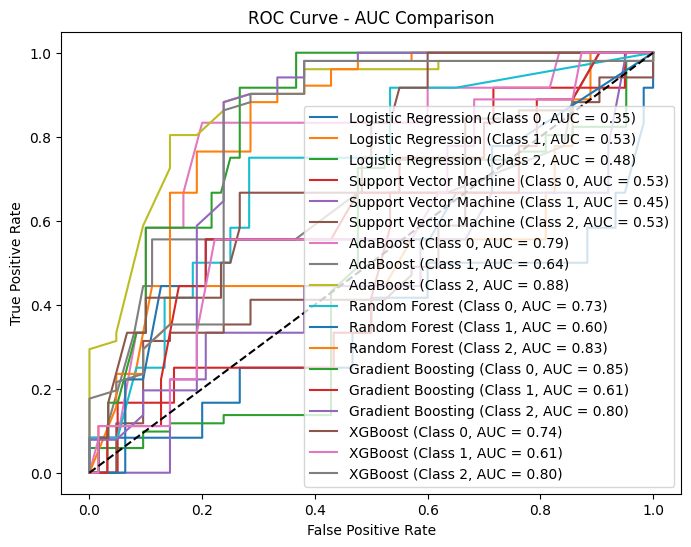

In [281]:
from sklearn.preprocessing import label_binarize # Import label_binarize from sklearn.preprocessing
import matplotlib.pyplot as plt

# Binarize the target variable for multiclass ROC analysis
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curves and AUC scores for individual models
plt.figure(figsize=(8, 6))

for name, model in models.items():
    # Enable probability estimation for models that support it
    if hasattr(model, 'probability'):
        model.probability = True

    model.fit(X_train, y_train)

    # Handle multiclass by iterating over classes
    for class_idx in range(y_test_binarized.shape[1]):
        y_pred_prob = model.predict_proba(X_test)[:, class_idx]
        fpr, tpr, _ = roc_curve(y_test_binarized[:, class_idx], y_pred_prob)
        auc_score = roc_auc_score(y_test_binarized[:, class_idx], y_pred_prob)
        plt.plot(fpr, tpr, label=f'{name} (Class {class_idx}, AUC = {auc_score:.2f})')

# Calculate ROC curve and AUC score for the ensemble model
# ... (similar handling for ensemble_model as above)

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AUC Comparison')
plt.legend()
plt.show()

#6. Result Visualization: Import the appropriate visualization package and:

#A. Plot the feature importance in descending order for each of the models using horizontal bar chart

Model Logistic Regression does not have feature importances.
Model Support Vector Machine does not have feature importances.


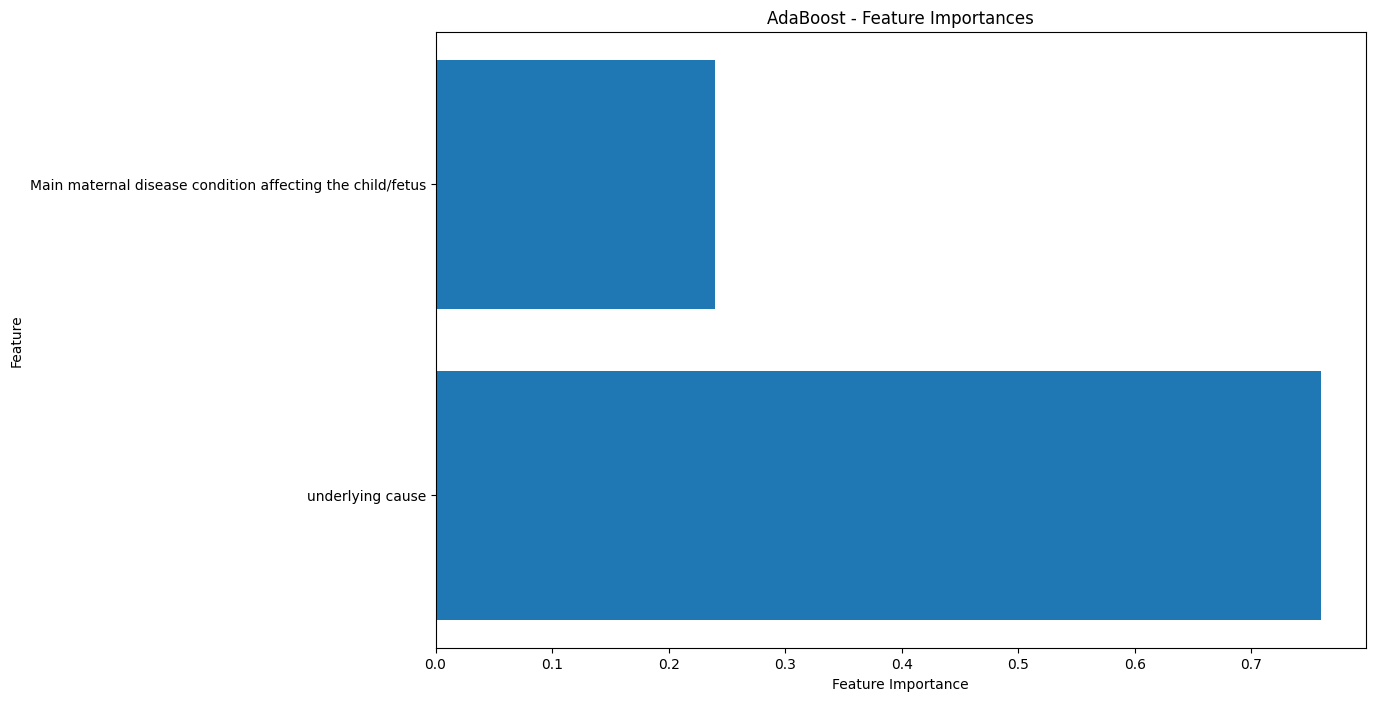

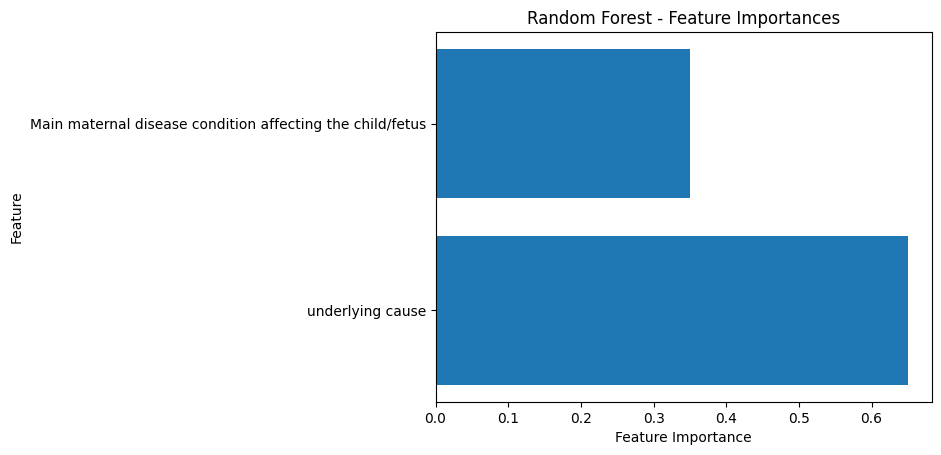

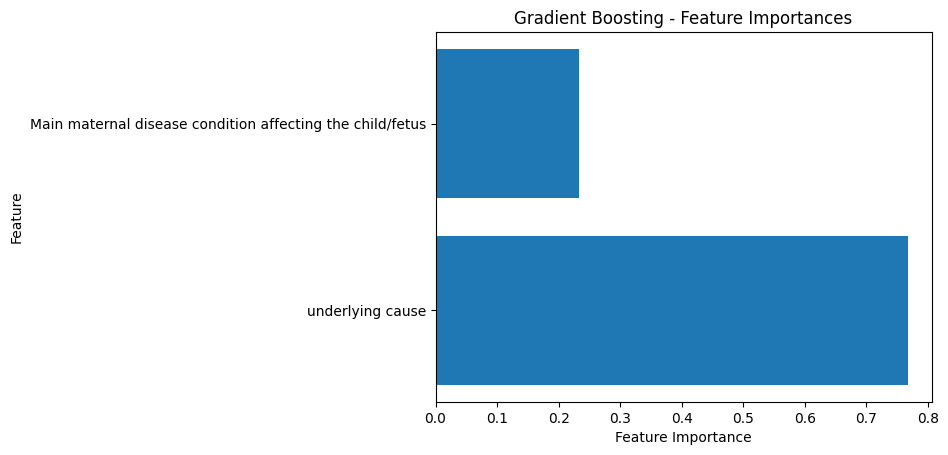

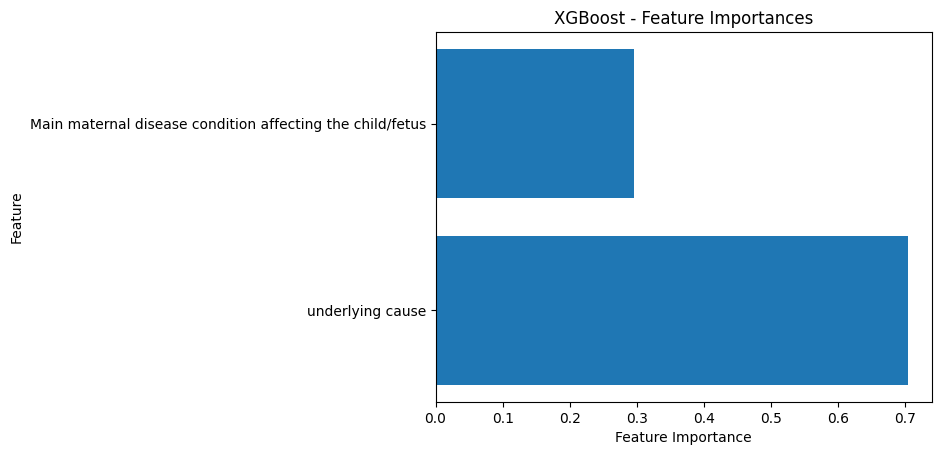

In [282]:
import matplotlib.pyplot as plt

# Plot feature importances for individual models
plt.figure(figsize=(12, 8))

for name, model in models.items():
    model.fit(X_train, y_train)

    # Check if the model has feature importances
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        sorted_indices = feature_importances.argsort()[::-1]
        features_sorted = X.columns[sorted_indices]
        importance_sorted = feature_importances[sorted_indices]

        plt.barh(range(len(features_sorted)), importance_sorted, align='center')
        plt.yticks(range(len(features_sorted)), features_sorted)
        plt.xlabel('Feature Importance')
        plt.ylabel('Feature')
        plt.title(f'{name} - Feature Importances')
        plt.show()
    else:
        print(f"Model {name} does not have feature importances.")

# B. Plot the top five infant underlying causes of the child death

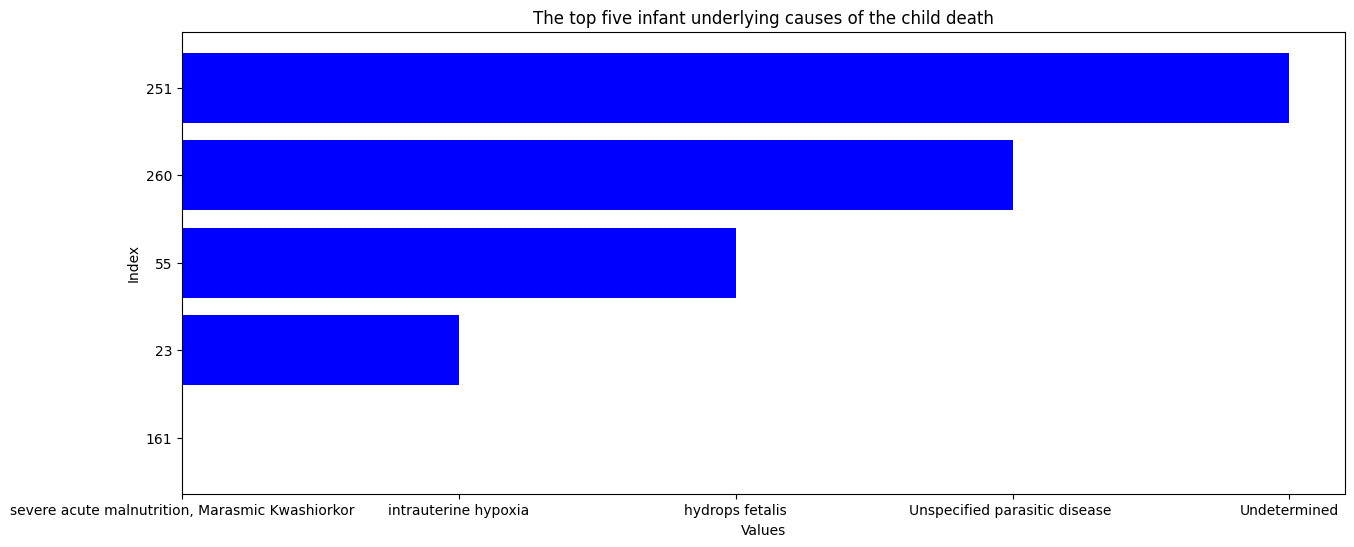

In [283]:
import matplotlib.pyplot as plt
underlying_cause = df_renamed['underlying cause']

# Sort the values in descending order and select the top data points
top_values = underlying_cause.sort_values(ascending=False).head(5)

# Plot the top data points in a bar plot
plt.figure(figsize=(15, 6))
plt.barh(range(len(top_values)), top_values, align='center', color='blue')
plt.yticks(range(len(top_values)), top_values.index)
plt.xlabel('Values')
plt.ylabel('Index')
plt.title('The top five infant underlying causes of the child death')
plt.show()

# C. Plot the top five maternal factors contributing to the child death

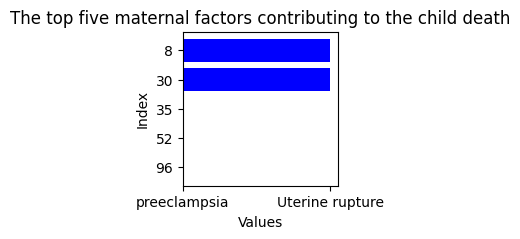

In [284]:
import matplotlib.pyplot as plt
maternal_factors = df_renamed['Main maternal disease condition affecting the child/fetus']

# Sort the values in descending order and select the top data points
top_values = maternal_factors.sort_values(ascending=False).head(5)

# Plot the top data points in a bar plot
plt.figure(figsize=(2, 2))
plt.barh(range(len(top_values)), top_values, align='center', color='blue')
plt.yticks(range(len(top_values)), top_values.index)
plt.xlabel('Values')
plt.ylabel('Index')
plt.title('The top five maternal factors contributing to the child death')
plt.show()

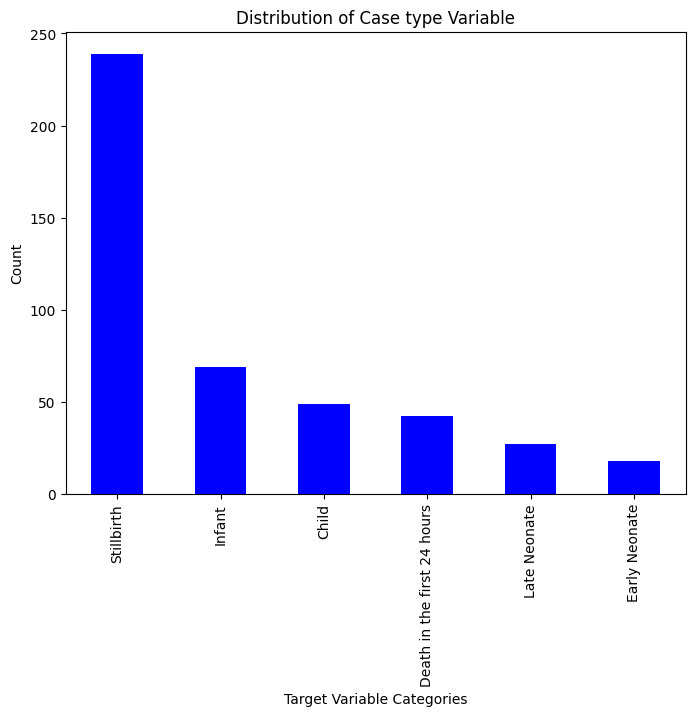

In [287]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and 'target' is the target variable column
plt.figure(figsize=(8, 6))
df_renamed['case_type'].value_counts().plot(kind='bar', color='blue')
plt.xlabel('Target Variable Categories')
plt.ylabel('Count')
plt.title('Distribution of Case type Variable')
plt.show()